In [4]:
from filemind.preprocessing import  Preprocessor

## Recupération des fichiers

In [5]:
# récupération de la liste des fichiers d'un recupère et de leur contexte

pathdir = "/home/mbe/Downloads"
preprocessor = Preprocessor(path_dir=pathdir, deep=True)

In [6]:
files, n = preprocessor.getFiles()

In [9]:
n

23

In [10]:
for i in range(n):
    print(files[i])
    print("\n")

{'file_path': '/home/mbe/Downloads/photo_2025-03-29_19-48-16.jpg', 'metadata': {'fileCreatedAt': 1743274099612684366, 'fileUpdatedAt': 1743274099612684366, 'fileAccessedAt': 1743274117758929110, 'fileSize': 35763, 'fileType': 'image'}}


{'file_path': '/home/mbe/Downloads/SDI_R2503.zip', 'metadata': {'fileCreatedAt': 1742515429988950705, 'fileUpdatedAt': 1742515429975954943, 'fileAccessedAt': 1742516318184072141, 'fileSize': 5625708, 'fileType': None}}


{'file_path': '/home/mbe/Downloads/commandlinetools-linux-11076708_latest.zip', 'metadata': {'fileCreatedAt': 1742581899970968808, 'fileUpdatedAt': 1740378373000000000, 'fileAccessedAt': 1742581892044890019, 'fileSize': 153607504, 'fileType': None}}


{'file_path': '/home/mbe/Downloads/tsetup.5.12.3.tar.xz', 'metadata': {'fileCreatedAt': 1742513336528083963, 'fileUpdatedAt': 1742513336110442078, 'fileAccessedAt': 1742513119549709993, 'fileSize': 59171596, 'fileType': None}}


{'file_path': '/home/mbe/Downloads/postman-linux-x64.tar.gz'

## Pretraitement des fichiers

In [11]:
# recupération des métadonnées des fichiers
metadatas = [{**file["metadata"]} for file in files]

In [12]:
metadatas[0]

{'fileCreatedAt': 1743274099612684366,
 'fileUpdatedAt': 1743274099612684366,
 'fileAccessedAt': 1743274117758929110,
 'fileSize': 35763,
 'fileType': 'image'}

In [13]:
from pandas import DataFrame, notnull

df = DataFrame(metadatas)

In [14]:
df.shape

(23, 10)

In [15]:
df.head()

,fileCreatedAt,fileUpdatedAt,fileAccessedAt,fileSize,fileType,title,author,creator,producer,subject
0,1743274099612684366,1743274099612684366,1743274117758929110,35763,image,NaN,NaN,NaN,NaN,NaN
1,1742515429988950705,1742515429975954943,1742516318184072141,5625708,None,NaN,NaN,NaN,NaN,NaN
2,1742581899970968808,1740378373000000000,1742581892044890019,153607504,None,NaN,NaN,NaN,NaN,NaN
3,1742513336528083963,1742513336110442078,1742513119549709993,59171596,None,NaN,NaN,NaN,NaN,NaN
4,1742719219773253852,1742719216810216230,1742998927970709849,150737492,None,NaN,NaN,NaN,NaN,NaN


In [16]:
# remplacer les valeurs non numérique par None
df = df.where(notnull(df), None)

In [17]:
df.head()

,fileCreatedAt,fileUpdatedAt,fileAccessedAt,fileSize,fileType,title,author,creator,producer,subject
0,1743274099612684366,1743274099612684366,1743274117758929110,35763,image,None,None,None,None,None
1,1742515429988950705,1742515429975954943,1742516318184072141,5625708,None,None,None,None,None,None
2,1742581899970968808,1740378373000000000,1742581892044890019,153607504,None,None,None,None,None,None
3,1742513336528083963,1742513336110442078,1742513119549709993,59171596,None,None,None,None,None,None
4,1742719219773253852,1742719216810216230,1742998927970709849,150737492,None,None,None,None,None,None


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fileCreatedAt   23 non-null     int64 
 1   fileUpdatedAt   23 non-null     int64 
 2   fileAccessedAt  23 non-null     int64 
 3   fileSize        23 non-null     int64 
 4   fileType        11 non-null     object
 5   title           2 non-null      object
 6   author          3 non-null      object
 7   creator         2 non-null      object
 8   producer        3 non-null      object
 9   subject         2 non-null      object
dtypes: int64(4), object(6)
memory usage: 1.9+ KB


Remplacement des valeurs manquantes

In [20]:
import math

if "fileType" in df.columns:
    df["fileType"] = df["fileType"].apply(lambda x: x if x else "file")

if "Frame_count" in df.columns:
    df["Frame_count"] = df["Frame_count"].apply(lambda x: int(x) if x else 0)

if "Height" in df.columns:
    df["Height"] = df["Height"].apply(lambda x: int(x) if x else 0)

if "Width" in df.columns:
    df["Width"] = df["Width"].apply(lambda x: int(x) if x else 0)

if "Duration" in df.columns:
    df["Duration"] = df["Duration"].apply(lambda x: float(x) if x else 0)


cols = ["author", "creator", "producer", "subject", "title", "Software", "Format"]
for c in cols:
    if c in df.columns:
        df[c] = df[c].apply(lambda x: x if x else "inconnu")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fileCreatedAt   23 non-null     int64 
 1   fileUpdatedAt   23 non-null     int64 
 2   fileAccessedAt  23 non-null     int64 
 3   fileSize        23 non-null     int64 
 4   fileType        23 non-null     object
 5   title           23 non-null     object
 6   author          23 non-null     object
 7   creator         23 non-null     object
 8   producer        23 non-null     object
 9   subject         23 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.9+ KB


suppression des champs non traitables (conservation des variables utiles uniquement)

In [22]:
keepColumns = [
    "fileCreatedAt",
    "fileUpdatedAt",
    "fileAccessedAt",
    "fileSize",
    "fileType",
    "title",
    "author",
    "creator",
    "producer",
    "subject",
    "Format",
    "Duration",
    "Width",
    "Height",
    "Frame_count",
    "Software",
]

keepColumns = [c for c in keepColumns if c in df.columns]

df = df[keepColumns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fileCreatedAt   23 non-null     int64 
 1   fileUpdatedAt   23 non-null     int64 
 2   fileAccessedAt  23 non-null     int64 
 3   fileSize        23 non-null     int64 
 4   fileType        23 non-null     object
 5   title           23 non-null     object
 6   author          23 non-null     object
 7   creator         23 non-null     object
 8   producer        23 non-null     object
 9   subject         23 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.9+ KB


In [24]:
df.describe()

,fileCreatedAt,fileUpdatedAt,fileAccessedAt,fileSize
count,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01
mean,1.742924e+18,1.741514e+18,1.742937e+18,9.379392e+07
std,3.363238e+14,4.164783e+15,3.341531e+14,2.618468e+08
min,1.742513e+18,1.728565e+18,1.742513e+18,9.840000e+03
25%,1.742582e+18,1.742514e+18,1.742582e+18,3.984800e+04
50%,1.742800e+18,1.742800e+18,1.742999e+18,7.088500e+05
75%,1.743272e+18,1.743272e+18,1.743272e+18,1.054065e+08
max,1.743330e+18,1.743330e+18,1.743330e+18,1.268722e+09


separation des données numériques des catégorielles

In [25]:
keepColumns

['fileCreatedAt',
 'fileUpdatedAt',
 'fileAccessedAt',
 'fileSize',
 'fileType',
 'title',
 'author',
 'creator',
 'producer',
 'subject']

In [26]:
cat_cols = [
    "fileType",
    "title",
    "author",
    "creator",
    "producer",
    "subject",
    "Format",
    "Software",
]

cat_cols = [c for c in cat_cols if c in df.columns]

num_cols = []
for col in df.columns:
    if col not in cat_cols:
        num_cols.append(col)

print(cat_cols)
print(num_cols)

['fileType', 'title', 'author', 'creator', 'producer', 'subject']
['fileCreatedAt', 'fileUpdatedAt', 'fileAccessedAt', 'fileSize']


categorisation des champs nominales

In [27]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_features = encoder.fit_transform(df[cat_cols])
encoded_df_cat = DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_cols))

numérisation des champs numériques

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_scaled = scaler.fit_transform(df[num_cols])
df_num_scaled = DataFrame(num_scaled, columns=num_cols)

In [29]:
from pandas import concat

df_final = concat([df_num_scaled, encoded_df_cat], axis=1)

In [30]:
df_final.shape

(23, 25)

In [31]:
df_final.head()

,fileCreatedAt,fileUpdatedAt,fileAccessedAt,fileSize,fileType_document,fileType_file,fileType_image,fileType_text,title_CamScanner 06-03-2025 15.22,title_Demande_FORGAS PAUL DE NKOABANG,...,creator_Microsoft® Word 2016,creator_TCPDF,creator_inconnu,producer_TCPDF 6.6.2 (http://www.tcpdf.org),producer_inconnu,producer_intsig.com pdf producer,producer_www.ilovepdf.com,subject_CamScanner 06-03-2025 15.22,subject_Demande_avance sur pension,subject_inconnu
0,0.931551,0.996210,0.931446,0.000020,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.003494,0.944828,0.004501,0.004426,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.084805,0.800091,0.084711,0.121066,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.000934,0.944686,0.000589,0.046631,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.252784,0.958630,0.594832,0.118804,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [32]:
df_final.describe()

,fileCreatedAt,fileUpdatedAt,fileAccessedAt,fileSize,fileType_document,fileType_file,fileType_image,fileType_text,title_CamScanner 06-03-2025 15.22,title_Demande_FORGAS PAUL DE NKOABANG,...,creator_Microsoft® Word 2016,creator_TCPDF,creator_inconnu,producer_TCPDF 6.6.2 (http://www.tcpdf.org),producer_inconnu,producer_intsig.com pdf producer,producer_www.ilovepdf.com,subject_CamScanner 06-03-2025 15.22,subject_Demande_avance sur pension,subject_inconnu
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.503528,0.876987,0.519495,0.073921,0.130435,0.521739,0.304348,0.043478,0.043478,0.043478,...,0.043478,0.043478,0.913043,0.043478,0.869565,0.043478,0.043478,0.043478,0.043478,0.913043
std,0.411414,0.282069,0.408738,0.206388,0.344350,0.510754,0.470472,0.208514,0.208514,0.208514,...,0.208514,0.208514,0.288104,0.208514,0.344350,0.208514,0.208514,0.208514,0.208514,0.288104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.084777,0.944757,0.084896,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.351072,0.964072,0.594832,0.000551,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.928926,0.996065,0.928812,0.083074,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df_final.corr()

,fileCreatedAt,fileUpdatedAt,fileAccessedAt,fileSize,fileType_document,fileType_file,fileType_image,fileType_text,title_CamScanner 06-03-2025 15.22,title_Demande_FORGAS PAUL DE NKOABANG,...,creator_Microsoft® Word 2016,creator_TCPDF,creator_inconnu,producer_TCPDF 6.6.2 (http://www.tcpdf.org),producer_inconnu,producer_intsig.com pdf producer,producer_www.ilovepdf.com,subject_CamScanner 06-03-2025 15.22,subject_Demande_avance sur pension,subject_inconnu
fileCreatedAt,1.000000,0.441137,0.984923,-0.358354,0.014186,-0.719110,0.700817,0.156770,-0.080781,-0.120450,...,0.224657,-0.120450,-0.075420,-0.120450,-0.014186,-0.080781,0.224657,-0.080781,-0.120450,0.145640
fileUpdatedAt,0.441137,1.000000,0.455965,-0.161682,0.135256,-0.389602,0.285632,0.086485,0.067302,0.064099,...,0.091968,0.064099,-0.112952,0.064099,-0.135256,0.067302,0.091968,0.067302,0.064099,-0.095101
fileAccessedAt,0.984923,0.455965,1.000000,-0.352442,-0.001301,-0.685542,0.679055,0.149222,-0.089887,-0.129804,...,0.217543,-0.129804,-0.063501,-0.129804,0.001301,-0.089887,0.217543,-0.089887,-0.129804,0.159001
fileSize,-0.358354,-0.161682,-0.352442,1.000000,-0.141413,0.350255,-0.242136,-0.078077,-0.077969,-0.078073,...,-0.077495,-0.078073,0.112592,-0.078073,0.141413,-0.077969,-0.077495,-0.077969,-0.078073,0.112934
fileType_document,0.014186,0.135256,-0.001301,-0.141413,1.000000,-0.404520,-0.256174,-0.082572,0.550482,0.550482,...,0.550482,0.550482,-0.796819,0.550482,-1.000000,0.550482,0.550482,0.550482,0.550482,-0.796819
fileType_file,-0.719110,-0.389602,-0.685542,0.350255,-0.404520,1.000000,-0.690849,-0.222681,-0.222681,-0.222681,...,-0.222681,-0.222681,0.322329,-0.222681,0.404520,-0.222681,-0.222681,-0.222681,-0.222681,0.322329
fileType_image,0.700817,0.285632,0.679055,-0.242136,-0.256174,-0.690849,1.000000,-0.141019,-0.141019,-0.141019,...,-0.141019,-0.141019,0.204124,-0.141019,0.256174,-0.141019,-0.141019,-0.141019,-0.141019,0.204124
fileType_text,0.156770,0.086485,0.149222,-0.078077,-0.082572,-0.222681,-0.141019,1.000000,-0.045455,-0.045455,...,-0.045455,-0.045455,0.065795,-0.045455,0.082572,-0.045455,-0.045455,-0.045455,-0.045455,0.065795
title_CamScanner 06-03-2025 15.22,-0.080781,0.067302,-0.089887,-0.077969,0.550482,-0.222681,-0.141019,-0.045455,1.000000,-0.045455,...,-0.045455,-0.045455,0.065795,-0.045455,-0.550482,1.000000,-0.045455,1.000000,-0.045455,-0.690849
title_Demande_FORGAS PAUL DE NKOABANG,-0.120450,0.064099,-0.129804,-0.078073,0.550482,-0.222681,-0.141019,-0.045455,-0.045455,1.000000,...,-0.045455,1.000000,-0.690849,1.000000,-0.550482,-0.045455,-0.045455,-0.045455,1.000000,-0.690849


In [34]:
high_corr_pairs = df_final.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.8]
high_corr_pairs


subject_inconnu  subject_inconnu    1.000000
fileCreatedAt    fileAccessedAt     0.984923
dtype: float64

## Clustering 

### by Kmeans

In [35]:
int(math.sqrt(n))

4

recherche du meilleur nombre de clusters 

on utilise la méthode ebowl qui consiste à observer la convergence de l'inertie intraclasse converge

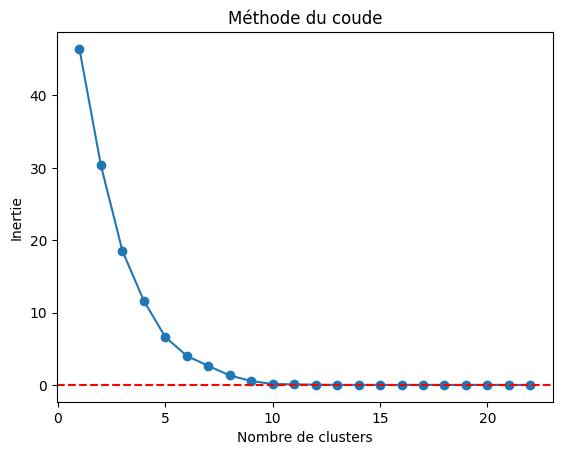

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
inertia = None
eps = 0.01
bestk = 1
K_range = range(1, int(n))
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_final)
    inertias.append(kmeans.inertia_)
    if inertia is not None:
        if abs(inertia - kmeans.inertia_) > eps:
            bestk = k
    inertia = kmeans.inertia_

plt.plot(K_range, inertias, marker="o")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Méthode du coude")
plt.axhline(y=inertias[bestk - 1], color="red", linestyle="--")
plt.show()

In [53]:
bestk 

13

clustering proprement dit

In [54]:
kmeans = KMeans(n_clusters=bestk, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_final)


In [55]:
df[["cluster","fileType"]]
pivot_table = df.pivot_table(index='cluster', columns='fileType', aggfunc='size', fill_value=0)
print(pivot_table)

fileType  document  file  image  text
cluster                              
0                0     4      0     0
1                0     0      7     0
2                1     0      0     0
3                1     0      0     0
4                0     1      0     0
5                1     0      0     0
6                0     2      0     0
7                0     0      0     1
8                0     1      0     0
9                0     1      0     0
10               0     1      0     0
11               0     1      0     0
12               0     1      0     0


In [56]:
print(df["cluster"].value_counts())

cluster
1     7
0     4
6     2
11    1
12    1
10    1
9     1
8     1
4     1
7     1
5     1
3     1
2     1
Name: count, dtype: int64


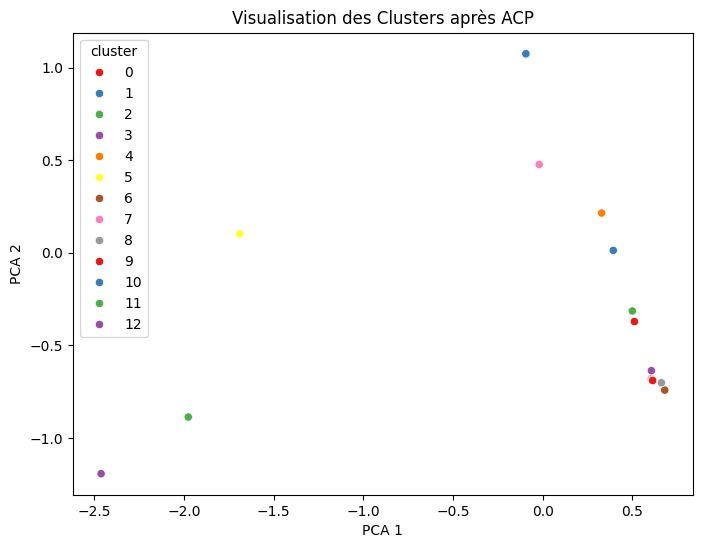

In [58]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df["cluster"], palette="Set1")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisation des Clusters après ACP")
plt.show()


On comprend ici que le clustering de fichier basée sur les métadonnées , dans le meilleur des cas avec kmeans sépare les fichiers par type de fichier

### by DBSCAN

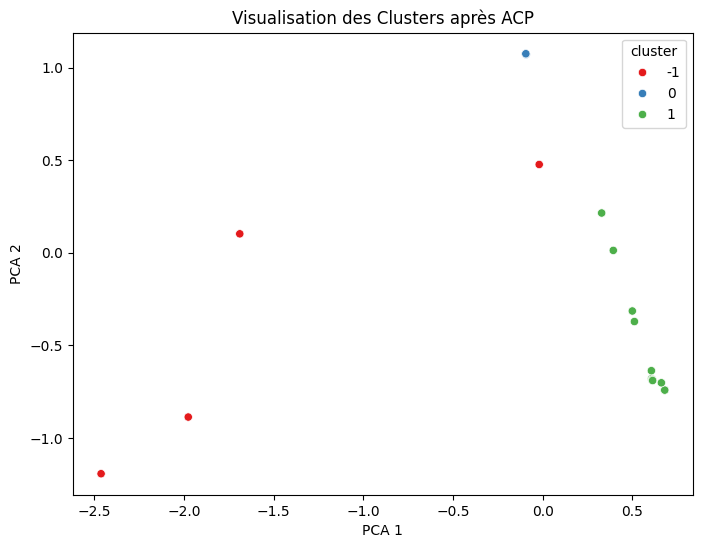

In [61]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns

# on devrait avoir minimum 5 fichier par group
dbscan = DBSCAN(eps=1, min_samples=5)
df["cluster"] = dbscan.fit_predict(df_final)


pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["cluster"], palette="Set1")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisation des Clusters après ACP")
plt.show()

In [62]:
df[["cluster","fileType"]]
pivot_table = df.pivot_table(index='cluster', columns='fileType', aggfunc='size', fill_value=0)
print(pivot_table)

fileType  document  file  image  text
cluster                              
-1               3     0      0     1
 0               0     0      7     0
 1               0    12      0     0


In [63]:
cf = df[df["cluster"]==0]

In [64]:
cf.describe()

,fileCreatedAt,fileUpdatedAt,fileAccessedAt,fileSize,cluster
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000,7.0
mean,1.743273e+18,1.743273e+18,1.743273e+18,45223.428571,0.0
std,1.248679e+12,1.248679e+12,1.320468e+12,22401.032550,0.0
min,1.743271e+18,1.743271e+18,1.743271e+18,28818.000000,0.0
25%,1.743272e+18,1.743272e+18,1.743272e+18,32487.000000,0.0
50%,1.743273e+18,1.743273e+18,1.743273e+18,39836.000000,0.0
75%,1.743274e+18,1.743274e+18,1.743274e+18,44784.000000,0.0
max,1.743274e+18,1.743274e+18,1.743274e+18,93368.000000,0.0


In [65]:
ccf = DataFrame(cf.describe()["fileSize"])

ccf["fileSize"].apply(lambda x: x / 1024**2)


count    0.000007
mean     0.043128
std      0.021363
min      0.027483
25%      0.030982
50%      0.037991
75%      0.042709
max      0.089043
Name: fileSize, dtype: float64